- 구글 드라이브 마운트

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd '../gdrive/MyDrive/nlp/from-scratch/nlp-from-scratch/code/word2vec'

/gdrive/MyDrive/nlp/from-scratch/nlp-from-scratch/code/word2vec


# 임포트, 데이터 불러오기

In [ ]:
# coding: utf-8
import sys
sys.path.append('../..')
import numpy as np
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ===============================================
config.GPU = True
# ===============================================
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from data import ptb

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [ ]:
# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [ ]:
# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)


#Train(CBOW)


In [ ]:
# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| epoch 1 |  itr 1/9295 | time 0.07263970375061035[s] | loss 4.158880710601807
| epoch 1 |  itr 21/9295 | time 0.5152289867401123[s] | loss 4.158473968505859
| epoch 1 |  itr 41/9295 | time 0.937227725982666[s] | loss 4.152516841888428
| epoch 1 |  itr 61/9295 | time 1.3677904605865479[s] | loss 4.121336936950684
| epoch 1 |  itr 81/9295 | time 1.7845327854156494[s] | loss 4.040249824523926
| epoch 1 |  itr 101/9295 | time 2.185642719268799[s] | loss 3.9162609577178955
| epoch 1 |  itr 121/9295 | time 2.617013454437256[s] | loss 3.7620551586151123
| epoch 1 |  itr 141/9295 | time 3.036947011947632[s] | loss 3.6305575370788574
| epoch 1 |  itr 161/9295 | time 3.459228515625[s] | loss 3.4829306602478027
| epoch 1 |  itr 181/9295 | time 3.8726730346679688[s] | loss 3.370436429977417
| epoch 1 |  itr 201/9295 | time 4.280999183654785[s] | loss 3.2771193981170654
| epoch 1 |  itr 221/9295 | time 4.71137547492981[s] | loss 3.1766793727874756
| epoch 1 |  itr 241/9295 | time 5.123340129852295

TypeError: ignored

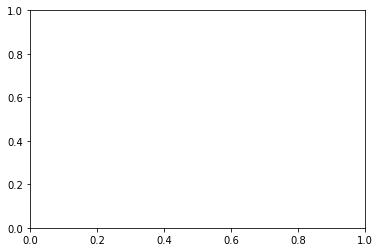

In [ ]:
# 학습 시작
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [ ]:
loss_list = trainer.loss_list
eval_interval = trainer.eval_interval

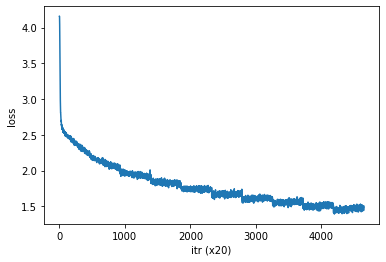

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(loss_list))
plt.plot(x, loss_list, label='train')
plt.xlabel('itr (x' + str(eval_interval) + ')')
plt.ylabel('loss')
plt.show()

In [ ]:

# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

# Train(SkipGram)

In [ ]:
# 모델 등 생성
model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [ ]:
trainer.fit(contexts, target, max_epoch, batch_size)

| epoch 1 |  itr 1/9295 | time 12.848769664764404[s] | loss 4.158824920654297
| epoch 1 |  itr 21/9295 | time 15.540318250656128[s] | loss 4.157937049865723
| epoch 1 |  itr 41/9295 | time 18.206352472305298[s] | loss 4.1468353271484375
| epoch 1 |  itr 61/9295 | time 20.913506507873535[s] | loss 4.099207878112793
| epoch 1 |  itr 81/9295 | time 23.623598337173462[s] | loss 3.9905102252960205
| epoch 1 |  itr 101/9295 | time 26.31159472465515[s] | loss 3.8462071418762207
| epoch 1 |  itr 121/9295 | time 29.013967037200928[s] | loss 3.6922287940979004
| epoch 1 |  itr 141/9295 | time 31.726665019989014[s] | loss 3.549696683883667
| epoch 1 |  itr 161/9295 | time 34.42977261543274[s] | loss 3.4326324462890625
| epoch 1 |  itr 181/9295 | time 37.15648365020752[s] | loss 3.3438735008239746
| epoch 1 |  itr 201/9295 | time 39.90166115760803[s] | loss 3.292099714279175
| epoch 1 |  itr 221/9295 | time 42.66503977775574[s] | loss 3.2044758796691895
| epoch 1 |  itr 241/9295 | time 45.36395668

- 시각화

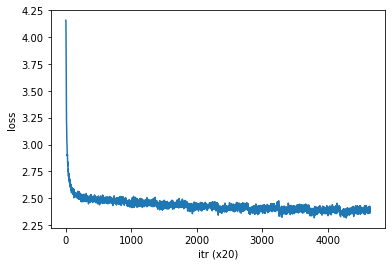

In [ ]:
import matplotlib.pyplot as plt

loss_list = trainer.loss_list
eval_interval = trainer.eval_interval

x = np.arange(len(loss_list))
plt.plot(x, loss_list, label='train')
plt.xlabel('itr (x' + str(eval_interval) + ')')
plt.ylabel('loss')
plt.show()

- 저장(skip-gram)

In [ ]:
# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)